In [199]:
import pandas as pd
import matplotlib.pyplot as plt
# Show entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# European Gas Trade Flows (IEA)

In [200]:
# Read Data/Gas Trade Flows - March 2024 - GTF_data.csv into a pandas DataFrame
GTF_data = pd.read_csv('Data/Gas Trade Flows - March 2024 - GTF_data.csv')

# Ensure data in columns Oct-08 to Jan-24 are floats. These are columns 5 and out
GTF_data.iloc[:, 5:] = GTF_data.iloc[:, 5:].apply(pd.to_numeric, errors='coerce')

# Split into import and export data
GTF_data_import = GTF_data.groupby('Entry').sum().reset_index()
GTF_data_import = GTF_data_import.drop(columns=['Borderpoint', 'Exit', 'MAXFLOW (Mm3/h)']) 
GTF_data_export = GTF_data.groupby('Exit').sum().reset_index()
GTF_data_export = GTF_data_export.drop(columns=['Borderpoint', 'Entry', 'MAXFLOW (Mm3/h)'])

# Create a new column 'Total' which is the sum of all the columns from Oct-08 to Jan-24, i.e., columns 2 and out
GTF_data_import['Total'] = GTF_data_import.iloc[:, 2:].sum(axis=1)
GTF_data_export['Total'] = GTF_data_export.iloc[:, 2:].sum(axis=1)

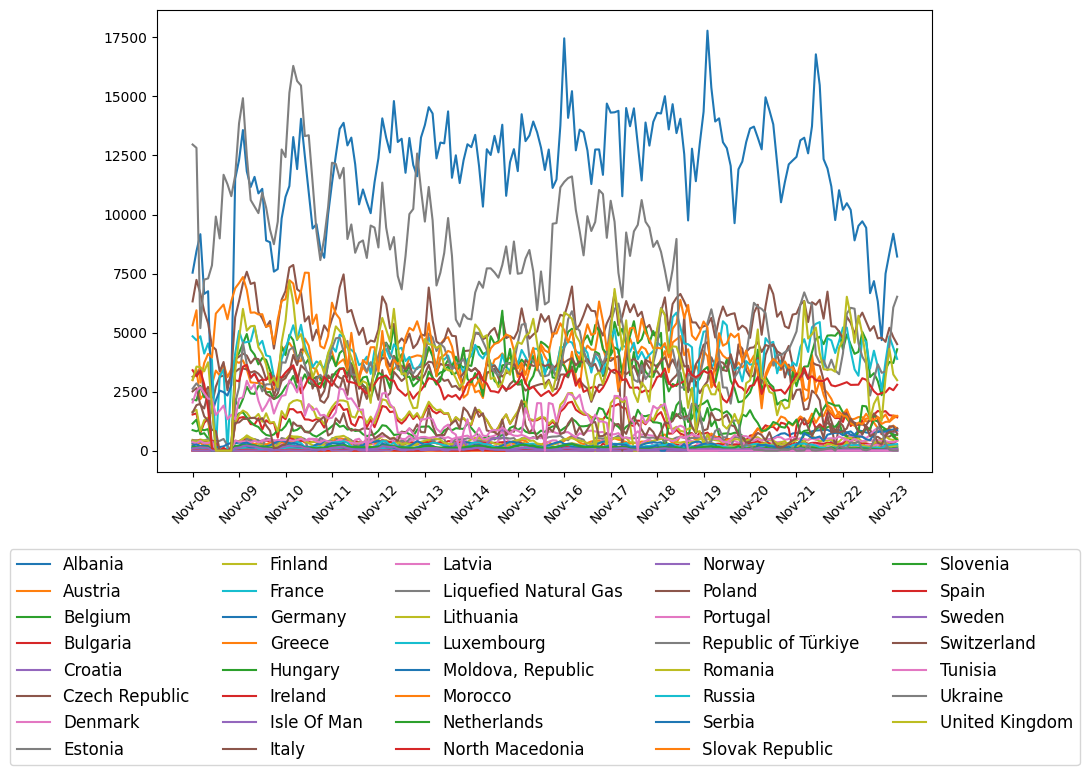

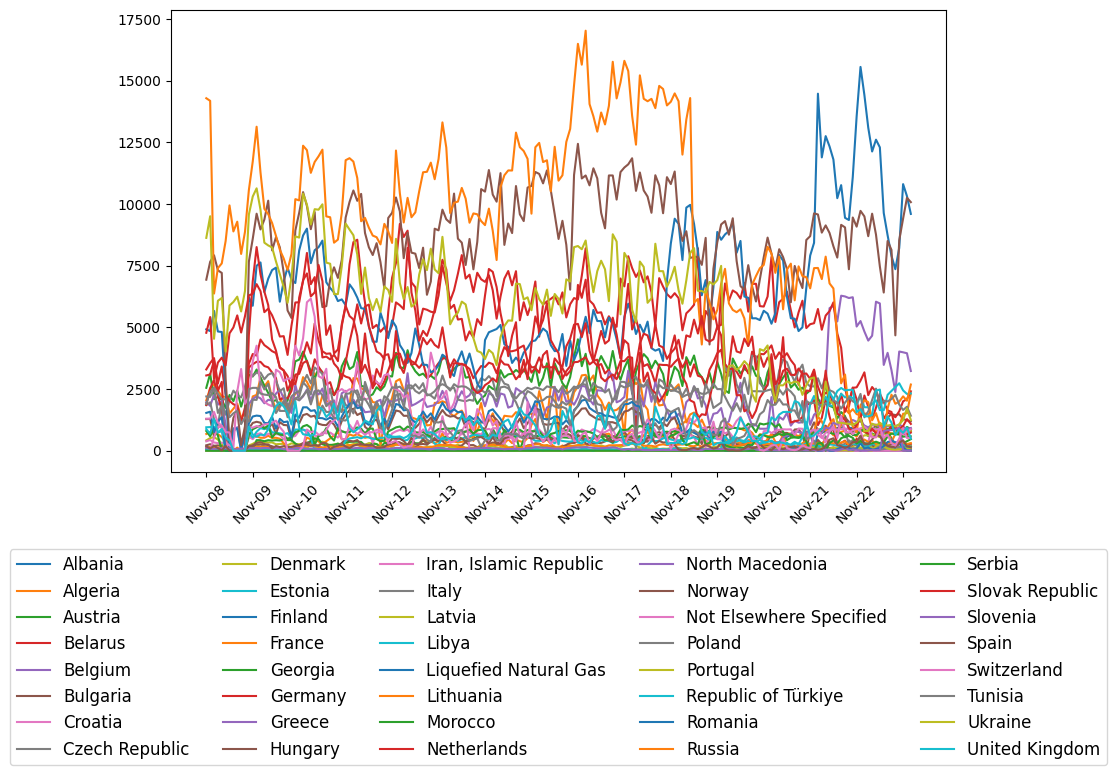

In [201]:
plt.figure(figsize=(10, 6))
for country in GTF_data_import.index:
    plt.plot(GTF_data_import.columns[2:-1], GTF_data_import.iloc[country, 2:-1], label=GTF_data_import.iloc[country, 0])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=12)
plt.xticks(GTF_data_import.columns[2:-1][::12], rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
for country in GTF_data_export.index:
    plt.plot(GTF_data_export.columns[2:-1], GTF_data_export.iloc[country, 2:-1], label=GTF_data_export.iloc[country, 0])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=12)
plt.xticks(GTF_data_export.columns[2:-1][::12], rotation=45)
plt.show()

In [202]:
GTF_data_import_top_10 = GTF_data_import.sort_values(by='Total', ascending=False).head(5)
GTF_data_import_top_10 = GTF_data_import_top_10.reset_index(drop=True)
GTF_data_export_top_10 = GTF_data_export.sort_values(by='Total', ascending=False).head(5)
GTF_data_export_top_10 = GTF_data_export_top_10.reset_index(drop=True)

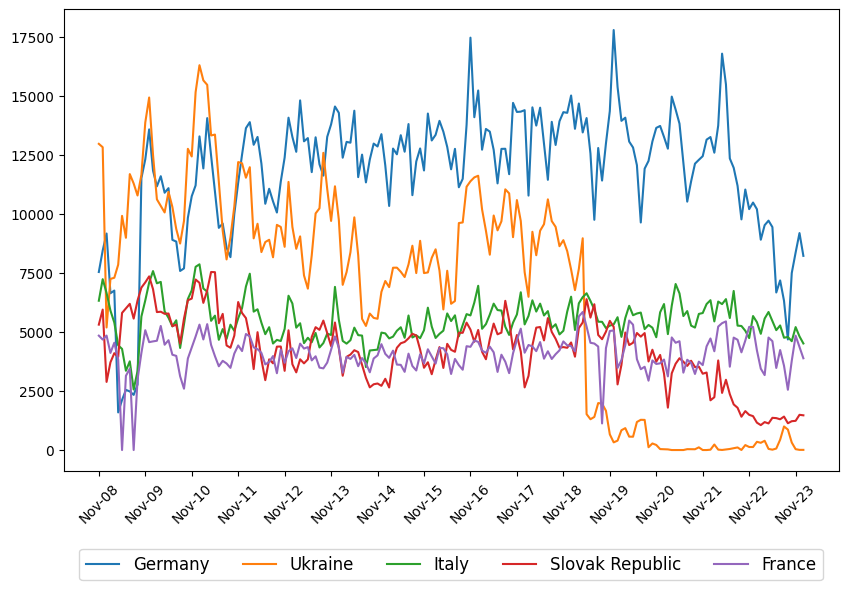

In [203]:
plt.figure(figsize=(10, 6))
for country in GTF_data_import_top_10.index:
    plt.plot(GTF_data_import_top_10.columns[2:-1], GTF_data_import_top_10.iloc[country, 2:-1], label=GTF_data_import_top_10.iloc[country, 0])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=12)
plt.xticks(GTF_data_import_top_10.columns[2:-1][::12], rotation=45)
plt.savefig('latex_figures/Gas_Exports_Top_5.png', bbox_inches='tight')

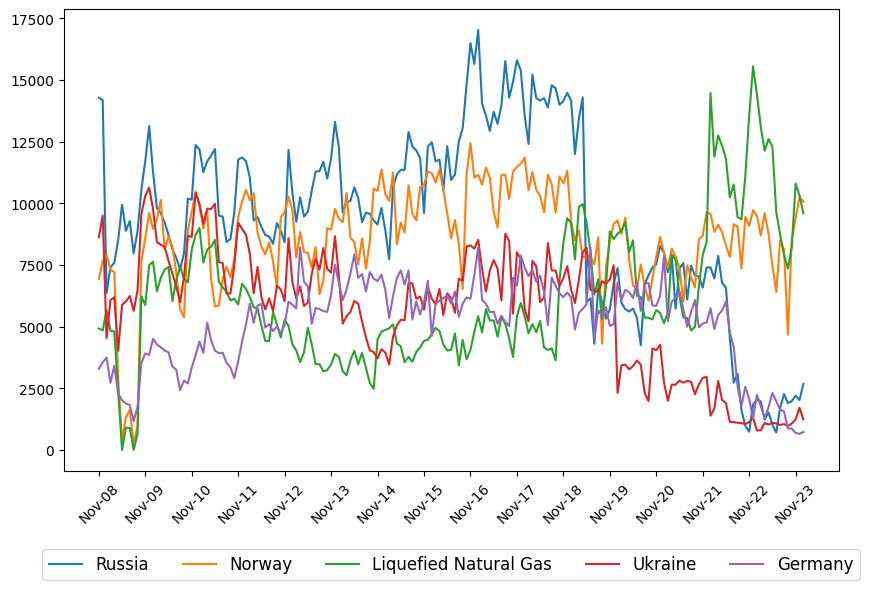

In [204]:
plt.figure(figsize=(10, 6))
for country in GTF_data_export_top_10.index:
    plt.plot(GTF_data_export_top_10.columns[2:-1], GTF_data_export_top_10.iloc[country, 2:-1], label=GTF_data_export_top_10.iloc[country, 0])
plt.xticks(GTF_data_export_top_10.columns[2:-1][::12], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=12)
# Save the legend as well
plt.savefig('latex_figures/Gas_Imports_Top_5.png', bbox_inches='tight')

# European Import Split (Bruegel)

In [205]:
# Read GEM-data/quarterly_graph_2024 Q1.xlsx into a pandas DataFrame
bruegel_data = pd.read_excel('Data/quarterly_graph_2024 Q1.xlsx')

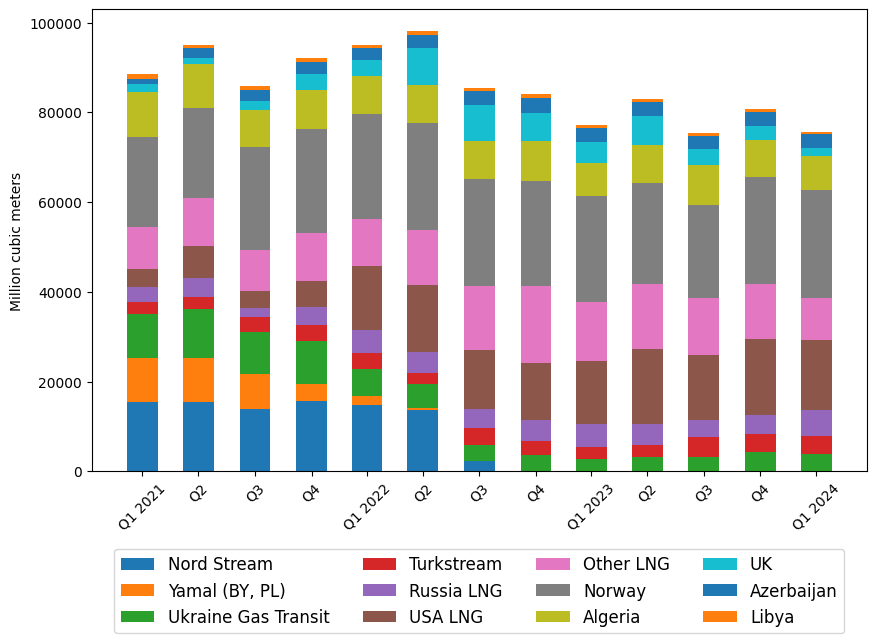

In [206]:
# Plot the bruegel_data. The dates column are quarters, and the rest of the columns are gas exports to the EU
# Plot it as a stacked bar chart, using the column names as labels
plt.figure(figsize=(10, 6))
for i in range(1, len(bruegel_data.columns)):
    plt.bar(bruegel_data['dates'], bruegel_data.iloc[:, i], label=bruegel_data.columns[i], bottom=bruegel_data.iloc[:, 1:i].sum(axis=1), width=50)
plt.xticks(bruegel_data['dates'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=12)
plt.xticks(bruegel_data['dates'], ['Q1 2021', 'Q2', 'Q3', 'Q4', 'Q1 2022', 'Q2', 'Q3', 'Q4', 'Q1 2023', 'Q2', 'Q3', 'Q4', 'Q1 2024'])
plt.ylabel('Million cubic meters')
plt.savefig('latex_figures/Gas_Exports_to_EU.png', bbox_inches='tight')


In [208]:
# Group Nord Stream, Yamal (BY, PL), Ukraine Gas Transit, Turkstream together and calculate its share of total gas exports
bruegel_data['Russia'] = bruegel_data['Nord Stream'] + bruegel_data['Yamal (BY, PL)'] + bruegel_data['Ukraine Gas Transit'] + bruegel_data['Turkstream']
bruegel_data['Russia Share'] = bruegel_data['Russia'] / bruegel_data.iloc[:, 1:].sum(axis=1)
bruegel_data['Other Share'] = 1 - bruegel_data['Russia Share']
bruegel_data

,dates,Nord Stream,"Yamal (BY, PL)",Ukraine Gas Transit,Turkstream,Russia LNG,USA LNG,Other LNG,Norway,Algeria,UK,Azerbaijan,Libya,Russia,Russia Share,Other Share
0,2021-03-31,15358.767633,9800.212527,9800.280924,2842.923903,3313.297135,4046.636956,9300.056200,20016.236610,10073.115669,1640.847652,1326.611411,914.029684,37802.184987,0.299458,0.700542
1,2021-06-30,15404.674290,9781.775321,10904.784728,2800.350375,4185.431649,7033.273347,10853.634810,19927.103754,9847.151268,1402.433750,2079.985046,772.946864,38891.584714,0.290485,0.709515
2,2021-09-30,13814.394331,7927.087842,9407.804200,3257.031165,1922.080024,3931.964138,8971.878168,23004.089289,8230.817689,1978.071210,2594.189696,827.956261,34406.317537,0.286067,0.713933
3,2021-12-31,15685.689929,3716.347772,9609.176896,3679.606779,3876.769107,5945.372823,10541.285255,23266.633750,8716.940050,3428.207872,2783.979061,801.294797,32690.821376,0.262067,0.737933
4,2022-03-31,14676.298610,2024.019694,6213.326652,3524.772532,5116.737828,14133.949131,10552.002362,23354.623895,8569.391952,3484.789383,2743.560731,512.836852,26438.417487,0.217879,0.782121
5,2022-06-30,13564.978276,649.777925,5339.892162,2434.798312,4668.580849,14897.026108,12234.781392,23893.976070,8361.206227,8164.030149,3107.038894,708.949297,21989.446675,0.183223,0.816777
6,2022-09-30,2264.982423,0.000000,3535.431775,3842.804850,4199.586221,13175.581999,14339.647314,23676.756738,8525.155166,8162.558954,3098.151523,593.110975,9643.219049,0.101447,0.898553
7,2022-12-31,0.000000,0.000000,3694.221499,3147.891807,4566.856133,12624.027920,17305.222743,23426.364254,8730.887417,6400.859889,3307.228577,873.443851,6842.113306,0.075255,0.924745
8,2023-03-31,0.000000,0.000000,2837.380096,2637.472494,5036.417725,14101.048245,13170.213642,23518.528435,7318.676874,4850.594403,3068.134926,691.298139,5474.852590,0.066198,0.933802
9,2023-06-30,0.000000,0.000000,3267.948682,2588.875575,4601.492368,16794.255840,14550.795481,22424.073815,8509.097454,6484.323957,3037.083973,722.073983,5856.824257,0.065928,0.934072


# European production vs. consumption

In [192]:
# Read Data/table into a pandas DataFrame
europe_split = pd.read_csv('Data/table')
europe_split = europe_split.transpose()
europe_split.columns = europe_split.iloc[0]
europe_split = europe_split.drop(europe_split.index[0])
europe_split = europe_split.reset_index()
europe_split = europe_split.rename(columns={'index': 'dates'})
europe_split['dates'] = pd.to_datetime(europe_split['dates'])
europe_split = europe_split.set_index('dates')

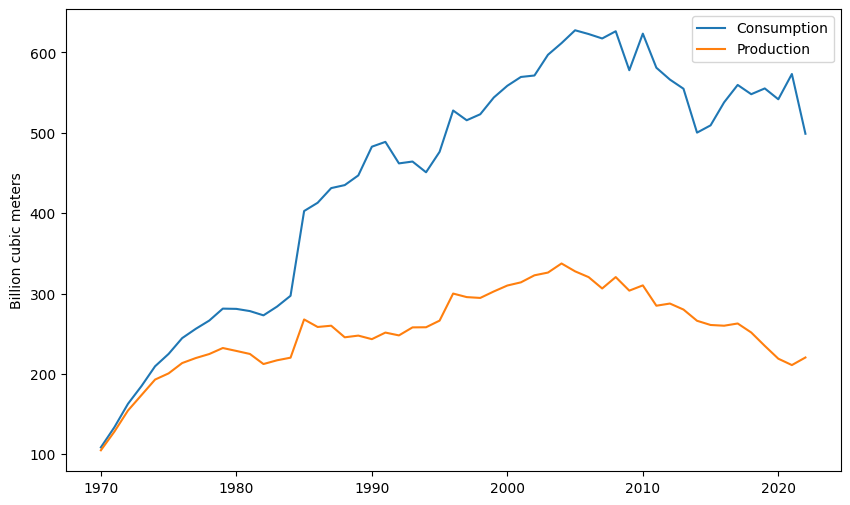

In [193]:
# Plot the europe_split. The first column is the date, the second is consumption and third is production
plt.figure(figsize=(10, 6))
plt.plot(europe_split.index, europe_split['Consumption'], label='Consumption')
plt.plot(europe_split.index, europe_split['Production'], label='Production')
plt.ylabel('Billion cubic meters')
plt.legend()
plt.savefig('latex_figures/europe_consumption_production.png', bbox_inches='tight')
plt.show()

# Final Consumption of Gas

## By sector

In [194]:
# Read data/International Energy Agency - final consumption of gas by sector in Europe.csv into a pandas DataFrame
iea_data = pd.read_csv('Data/International Energy Agency - final consumption of gas by sector in Europe.csv')
iea_data = iea_data.pivot(columns='Year', values='Value', index='final consumption of gas by sector in Europe')
iea_data.index.name = 'Sector'
iea_data = iea_data.apply(pd.to_numeric, errors='coerce')
iea_data.to_csv('Data/iea_data.csv')

In [195]:
# Read Data/iea_data.csv into a pandas DataFrame
iea_data = pd.read_csv('Data/iea_data.csv', index_col='Sector')
iea_data = iea_data.apply(pd.to_numeric, errors='coerce')
iea_data = iea_data / 1000000

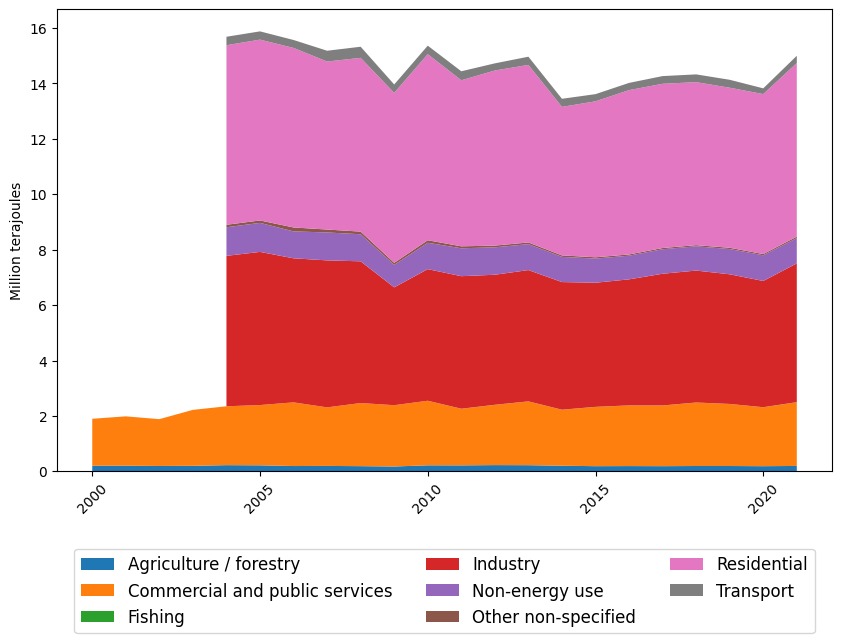

In [196]:
# Plot the iea_data using plt.stackplot. Let the x-axis be the years, and the y-axis be the values
plt.figure(figsize=(10, 6))
plt.stackplot(iea_data.columns, iea_data.values)
plt.legend(iea_data.index, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=12)
plt.xticks(iea_data.columns[::5], rotation=45)
plt.ylabel('Million terajoules')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('latex_figures/EU_final_gas_consumption.png', bbox_inches='tight')
plt.show()

In [197]:
# Create a new dataframe called iea_data_perc which is the percentage of each sector in each year
iea_data_perc = iea_data.div(iea_data.sum(axis=0), axis=1) * 100
iea_data_perc

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Sector,,,,,,,,,,,,,,,,,,,,,,
Agriculture / forestry,1.400155,1.361453,1.322842,1.309806,1.431690,1.376164,1.234583,1.292649,1.228207,1.257982,1.424169,1.499929,1.537454,1.491942,1.513432,1.376839,1.362058,1.316248,1.350924,1.367246,1.353556,1.304196
Commercial and public services,11.627349,11.899329,11.477189,13.224836,13.543085,13.696615,14.761899,13.924407,14.863806,15.846094,15.163988,14.148643,14.766926,15.380446,15.028360,15.710322,15.607498,15.346188,15.981964,15.840025,15.381295,15.323588
Fishing,NaN,NaN,NaN,NaN,0.000102,0.000132,0.000161,0.000138,0.000463,0.000652,0.001315,0.010099,0.015249,0.009631,0.011001,0.017074,0.013363,0.013293,0.013683,0.012117,0.016621,0.025501
Industry,37.723309,37.013785,37.446544,36.345874,34.617573,34.804300,33.391020,34.943147,33.373479,30.453769,30.914626,33.126016,31.870705,31.663202,34.254716,32.905063,32.448317,33.320645,33.237456,33.109216,32.959848,33.387411
Non-energy use,5.474733,5.140371,4.832858,4.840807,6.574316,6.599696,6.242633,6.640450,6.373498,5.804171,6.195974,6.975457,6.722991,6.250843,6.765628,6.394042,6.096862,6.194585,6.109396,6.443543,6.708734,6.093777
Other non-specified,2.128447,2.098857,1.883832,0.569223,0.576269,0.544142,0.911130,0.692772,0.620846,0.535511,0.592340,0.483386,0.421146,0.407949,0.391089,0.347668,0.312753,0.314847,0.291827,0.331551,0.320450,0.348672
Residential,40.368107,40.965508,41.546927,41.919216,41.311169,41.101207,41.620896,39.942440,40.923584,43.929457,43.712060,41.510881,42.911707,42.817497,39.862407,41.346044,42.305966,41.545685,41.062342,40.871730,41.760416,41.775324
Transport,1.277900,1.520697,1.489809,1.790238,1.945797,1.877745,1.837679,2.563996,2.616116,2.172365,1.995527,2.245588,1.753821,1.978489,2.173367,1.902948,1.853183,1.948508,1.952408,2.024573,1.499081,1.741533


## By country

In [132]:
by_country = pd.read_excel('Data/nrg_cb_gas_page_spreadsheet.xlsx', sheet_name='Sheet 1')
by_country.columns = ['Country', 'Consumption']
by_country = by_country.set_index('Country')
by_country = by_country.apply(pd.to_numeric, errors='coerce')
by_country.sort_values(by='Consumption', ascending=False, inplace=True)
by_country.head()


,Consumption
Country,
Germany,3155098.147
Italy,2618555.417
Türkiye,1952331.980
France,1570871.963
Spain,1318784.347


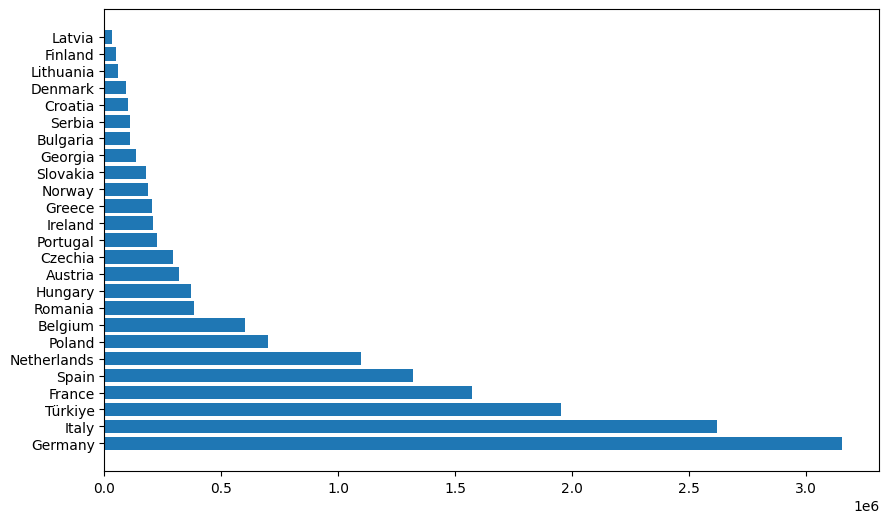

In [133]:
# As a horizontal bar chart, plot the top 25 countries by gas consumption, from most to least
plt.figure(figsize=(10, 6))
plt.barh(by_country.index[:25], by_country['Consumption'][:25])
plt.show()

In [134]:
# Read data/eu_natural_gas_dependency.csv into a pandas DataFrame
eu_dependency = pd.read_csv('Data/eu_natural_gas_dependency.csv')

# Join the by_country and eu_dependency DataFrames on the 'Country' column
by_country = by_country.join(eu_dependency.set_index('Country'))
by_country

# Remove entries with 0 or NaN in either the 'Consumption' or 'Dependency' columns
by_country = by_country.dropna()
by_country = by_country[(by_country['Consumption'] != 0) & (by_country['Dependency'] != 0)]

# Convert the dependency from a string "93,30%" to a float 93.30
by_country['Dependency'] = by_country['Dependency'].str.rstrip('%').str.replace(',', '.').astype(float)

# Divide the 'Consumption' column by 1000000 to convert from terajoules to million terajoules
by_country['Consumption'] = by_country['Consumption'] / 1000000

by_country

,Consumption,Dependency
Country,,
Germany,3.155098,93.30
Italy,2.618555,95.78
Türkiye,1.952332,98.60
France,1.570872,97.44
Spain,1.318784,98.61
Netherlands,1.099017,65.64
Belgium,0.600471,100.69
Romania,0.384569,4.65
Hungary,0.369067,96.61


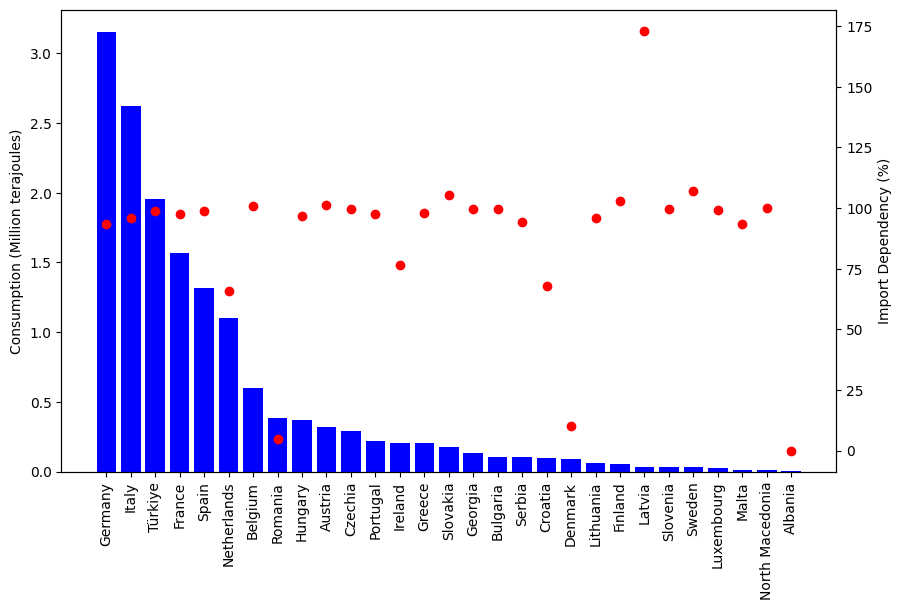

In [136]:
# Plot the Consumption and Dependency columns of by_country in a twin-axis plot.
# I.e., for each entry, plot the Consumption on the left y-axis as a bar, and the Dependency on the right y-axis as a point
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.xticks( rotation=90)
ax2 = ax1.twinx()
ax1.bar(by_country.index, by_country['Consumption'], color='b')
ax2.plot(by_country.index, by_country['Dependency'], 'ro')
ax1.set_ylabel('Consumption (Million terajoules)')
ax2.set_ylabel('Import Dependency (%)')
ax1.ticklabel_format(style='plain', axis='y')
plt.savefig('latex_figures/Consumption_vs_Dependency.png', bbox_inches='tight')
plt.show()

In [198]:
# Create by_country_perc which is the percentage of each country's consumption in the total consumption
by_country_perc = by_country['Consumption'] / by_country['Consumption'].sum() * 100
by_country_perc

Country
Germany            20.624865
Italy              17.117487
Türkiye            12.762387
France             10.268784
Spain               8.620889
Netherlands         7.184271
Belgium             3.925275
Romania             2.513927
Hungary             2.412590
Austria             2.098401
Czechia             1.928817
Portugal            1.459905
Ireland             1.357027
Greece              1.339159
Slovakia            1.153107
Georgia             0.877480
Bulgaria            0.707126
Serbia              0.704083
Croatia             0.648604
Denmark             0.601873
Lithuania           0.389683
Finland             0.336642
Latvia              0.210414
Slovenia            0.207864
Sweden              0.205593
Luxembourg          0.161095
Malta               0.098161
North Macedonia     0.072893
Albania             0.011598
Name: Consumption, dtype: float64